$\textbf{Ordinary Least Squares (OLS) Package Installation:}$

To use OLS, you can install statsmodels package using "pip install statsmodels" and use its OLS function.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm



$\textbf{Empirical Exercise-Week 1}$  Page 91, Problem 2.26
Lets look at another example from your book, relating food expenditure to income and an indicator variable for education. 

In [2]:
Tab1=pd.read_csv('cex5_small.csv')

In [4]:
Tab1.size

12000

In [5]:
Tab1.iloc[:1,:]

,advanced,alcbev,appar,college,entert,food,foodaway,health,income,smsa
0,0,11.11,0.0,0,43.44,9.63,47.56,58.22,123.7,1


foodaway is expenditures on Food away from home and income is household monthly income in $100 units. foodaway is in column 6 and income in column 8. So define the variables from the Matrix.  Note one difference from Matlab:  advanced is column 0, not 1, from the Tab1, so food is Column 8 and income is in column 8. This is a very key difference.  

In [6]:
foodaway=Tab1.iloc[:,6]
income=Tab1.iloc[:,8]

Change the format of both variables to a real "array" number from a Pandas Series.

In [7]:
foodaway1 = np.array(foodaway)
income1 = np.array(income)

It is always good to look at the data first. We plot the historgram for each variable.

Text(0.5, 1.0, 'Income')

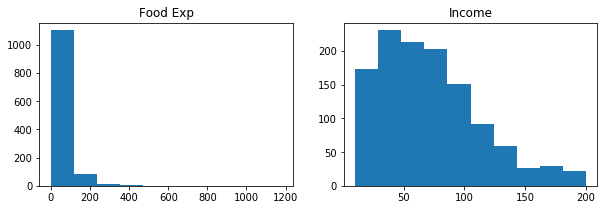

In [9]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,3))
ax1.hist(foodaway1)
ax1.set_title('Food Exp')
ax2.hist(income1)
ax2.set_title('Income')

Look at some of the statistics

In [10]:
np.array([[foodaway1.mean(), foodaway1.std(ddof=1)],
          [income1.mean(), income1.std(ddof=1)]])

array([[49.27085   , 65.28361118],
       [72.14264167, 41.6522788 ]])

We see that foodaway has higher volatility than income but a lower mean.

Now lets setup a regression. Simple one.

Lets do a regression of foodaway1 on a constant term and income1.

In [11]:
xx = sm.add_constant(income1)
yy = foodaway1

In [12]:
who

Tab1	 ax1	 ax2	 fig	 foodaway	 foodaway1	 income	 income1	 np	 
pd	 plt	 sm	 xx	 yy	 


In [13]:
model = sm.OLS(yy, xx)
results = model.fit()
beta=results.params
beta

array([13.71384894,  0.49287079])

In [15]:
tstat = results.tvalues
tstat

array([ 3.83013892, 11.46584989])

Now lets do a regression of foodaway1 on a constant and an indicator variable, advanced.

In [16]:
advanced = Tab1.iloc[:,0]
advanced1 = np.array(advanced)
xxx = sm.add_constant(advanced1)

In [18]:
result1 = sm.OLS(yy,xxx).fit()
beta1 = result1.params
beta1

array([42.76161188, 30.39332976])

Answer to question: mean expenditures on food away for a household with an advanced degree is 42.7616 + 30.3933. For a household with no advanced degree, it is 42.7616. So we can conclude that households with advanced degree members spend a lot more on food away from home. Now a good exercise is to see if the households with advanced degrees spend more on health. Do a similar regression, defining the new variable health1 as the dependent variable. A good exercise is to plot the residuals. We learn a lot from the residuals. Lets do it for the regression of food expenditures on income.

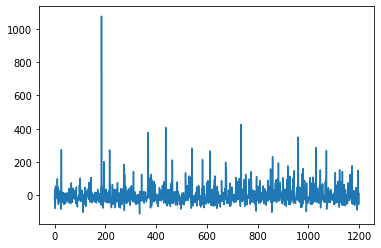

In [19]:
ehat = results.resid
plt.plot(ehat);

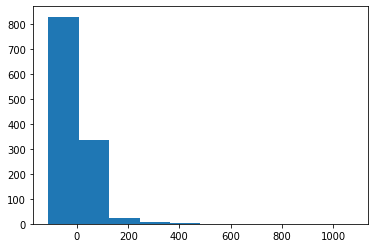

In [20]:
plt.hist(ehat);

We will come back to further discussion. We are now just working with the simple linear model.

In [22]:
np.hstack([results.params.reshape(2,1),results.conf_int()])

array([[13.71384894,  6.68908206, 20.73861583],
       [ 0.49287079,  0.40853462,  0.57720697]])

The cell above gives the intercept and slope, as well as their 95 confidence intervals.

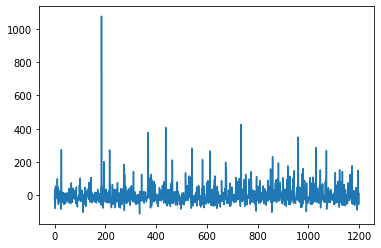

In [23]:
R=results.resid
plt.plot(R);  # Plot residuals again